# Import Libraries & Functions

In [1]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno 

from scipy import stats

pd.set_option('display.max_columns', 999)


    FUNCTIONS

In [3]:
def check_each_col(cols):
    for col in cols:
        print(col)
        print(df[col].unique())

# Column Names & Descriptions for Kings County Data Set


* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Loading and Exploring Data Initial


## Import & Quick Look In

In [4]:
df = pd.read_csv('../kc_house_data.csv')

In [5]:
df.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.shape

(21597, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Inital findings (markdown)


* **pricePrice** -  CHANGE TO FLOAT/INT;  ***is prediction target** 


Features
* **id** - unique ids; values don't really *prob not predict*
    * check for duplicates
* **dateDate** - CHANGE TO DATE/TIME OBJECTS; house was sold
* **yr_built** - CHANGE TO DATE/TIME; Built Year
* **yr_renovated** - CHANGE TO DATE/TIME; Year house was renovated **MISSING VALUE**


*Prob pick one*
Test which one has better predictability
* **bedroomsNumber** -  CHANGE TO FLOAT/INT; # of bedrooms
* **bathroomsNumber** -  CHANGE TO FLOAT/INT; # bathrooms/bedrooms 
* **floorsTotal** -  CHANGE TO FLOAT/INT; floors'lvls in house


*Probabily pick one*
Test which one has better predictability
* **sqft_livingsquare** -  CHANGE TO FLOAT/INT; sqft of the home
* **sqft_lotsquare** -  CHANGE TO FLOAT/INT; sqft of the lot
* **sqft_living15** - CHANGE TO FLOAT/INT;sqft of inside house living space of nearest 15 neighbors
* **sqft_lot15** - CHANGE TO FLOAT/INT; sqft of land lots of nearest 15 neighbors
* **sqft_above** - CHANGE TO FLOAT/INT; sqft of house apart from basement
* **sqft_basement** - CHANGE TO FLOAT/INT; sqft of the basement


*Probabily pick one*
Test which one has better predictability
* **waterfront** - CHANGE TO FLOAT/INT; CATEGORICAL; House that has view of waterfront ***missing values**
* **view** - CATEGORICAL; CHANGE TO FLOAT/INT; Maybe; Has been viewed **missing**
* **condition** - CHANGE TO FLOAT/INT; CATEGORICAL; How's the condition ( Overall )
* **grade** - CHANGE TO FLOAT/INT; CATEGORICAL overall grade of housing unit, King County grading system

Where the places are
*maybe make folium?*
* **zipcode** - CHANGE TO DATE/TIME
* **lat** - CHANGE TO FLOAT/INT; Latitude coordinate
* **long** - CHANGE TO FLOAT/INT; Longitude coordinate


## Visual Findings

/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Alisa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 720x720 with 0 Axes>

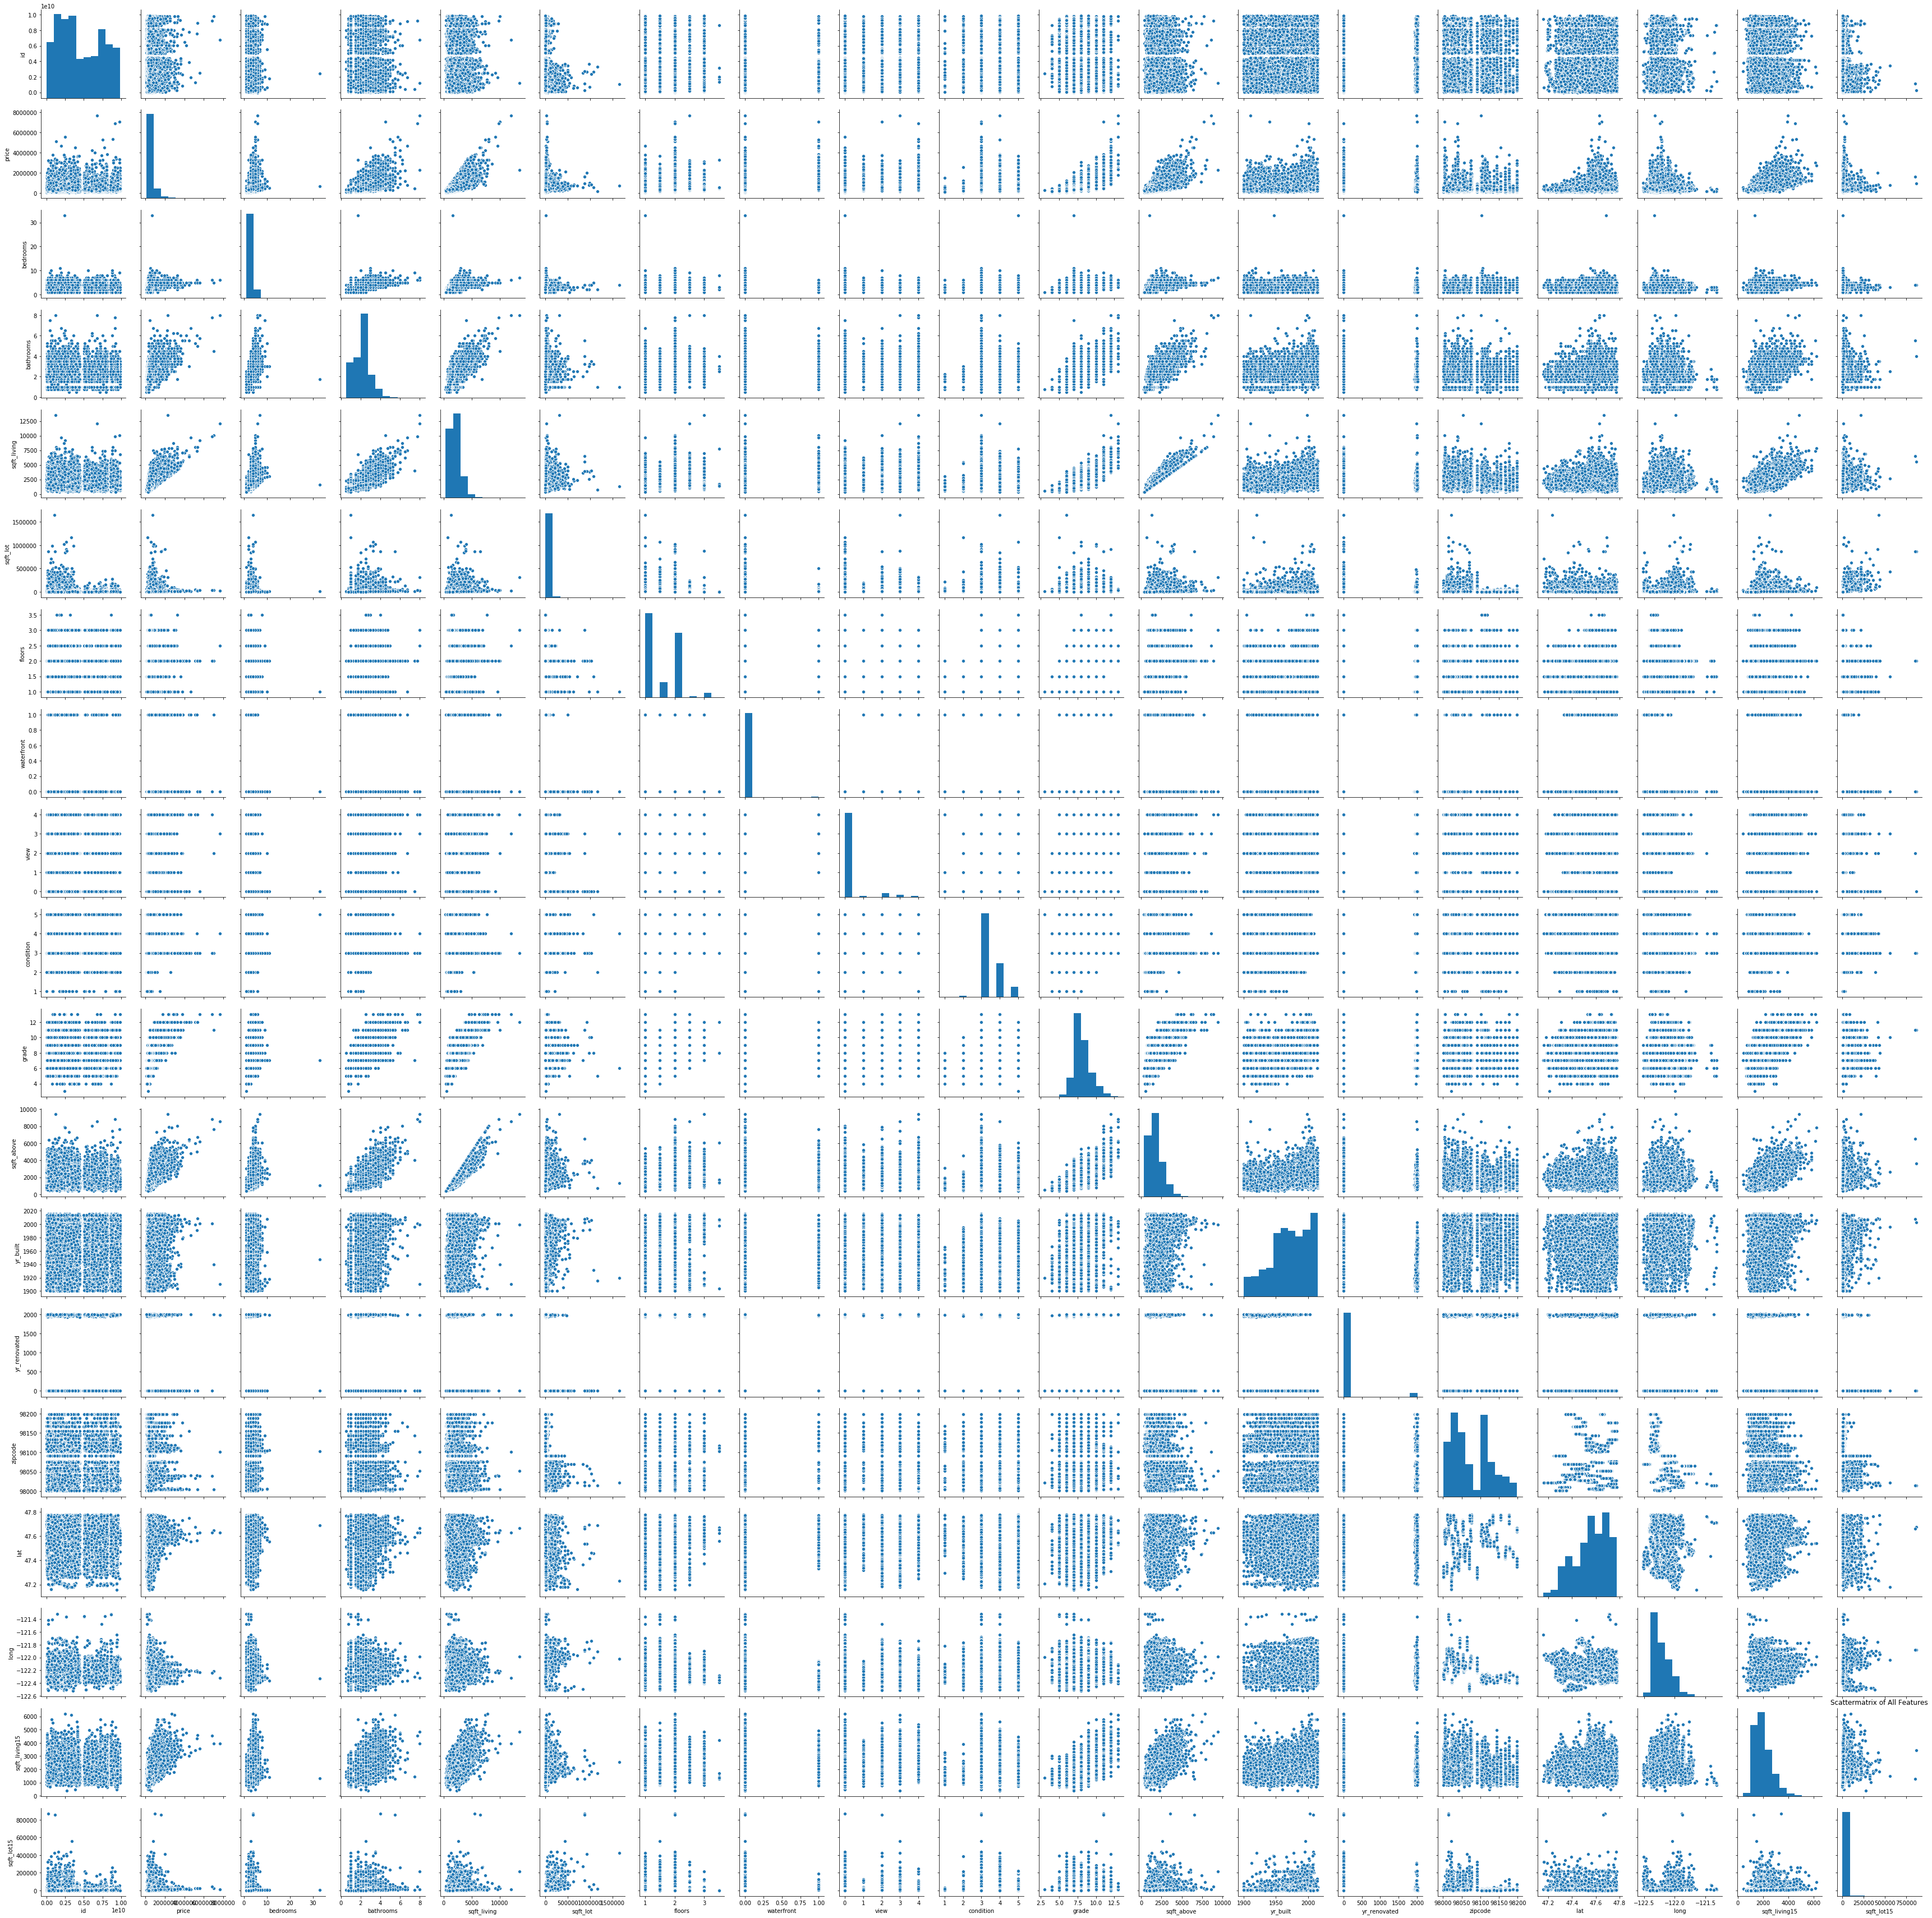

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.title("Scattermatrix of All Features")
plt.show()

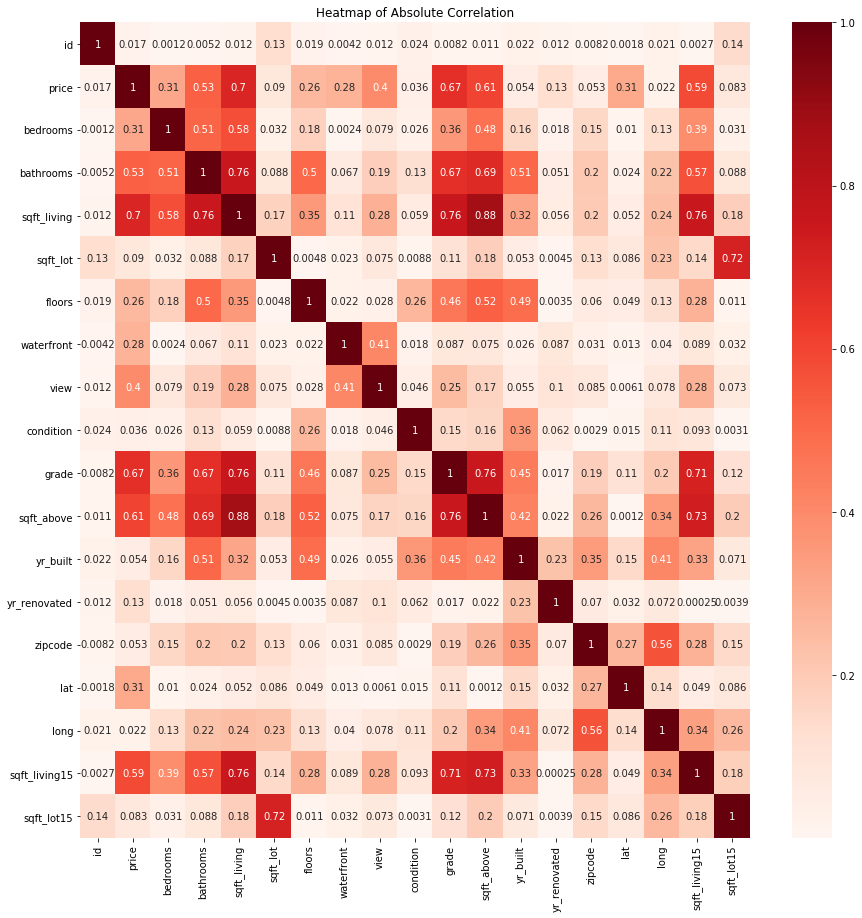

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().abs(), cmap='Reds', annot=True)
plt.autoscale()
plt.title('Heatmap of Absolute Correlation')
plt.show()

Looks like **sqft_living15, grade, sqft_living, bathrooms, sqft_above** have the highest correlation to the *target* "price"


# Missing Data

## Duplicates

In [12]:
df.loc[df['id'].duplicated(keep=False)][:4]

id        date      price  bedrooms  bathrooms  sqft_living  \
93   6021501535   7/25/2014   430000.0         3       1.50         1580   
94   6021501535  12/23/2014   700000.0         3       1.50         1580   
313  4139480200   6/18/2014  1380000.0         4       3.25         4290   
314  4139480200   12/9/2014  1400000.0         4       3.25         4290   

     sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
93       5000     1.0         0.0   0.0          3      8        1290   
94       5000     1.0         0.0   0.0          3      8        1290   
313     12103     1.0         0.0   3.0          3     11        2690   
314     12103     1.0         0.0   3.0          3     11        2690   

    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
93          290.0      1939           0.0    98117  47.6870 -122.386   
94          290.0      1939           0.0    98117  47.6870 -122.386   
313        1600.0      1997           0.0    98006  47.5503 -122.102   
314        1600.0      1997           0.0    98006  47.5503 -122.102   

     sqft_living15  sqft_lot15  
93            1570        4500  
94            1570        4500  
313           3860       11244  
314           3860       11244

    There are duplicates but they are all different dates and prices sold

## IsNan Data

Missing **yr_renovated** and **waterfront** and **view**

*kept yr_renovated; dropped waterfront and view; kept duplicates*

In [13]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

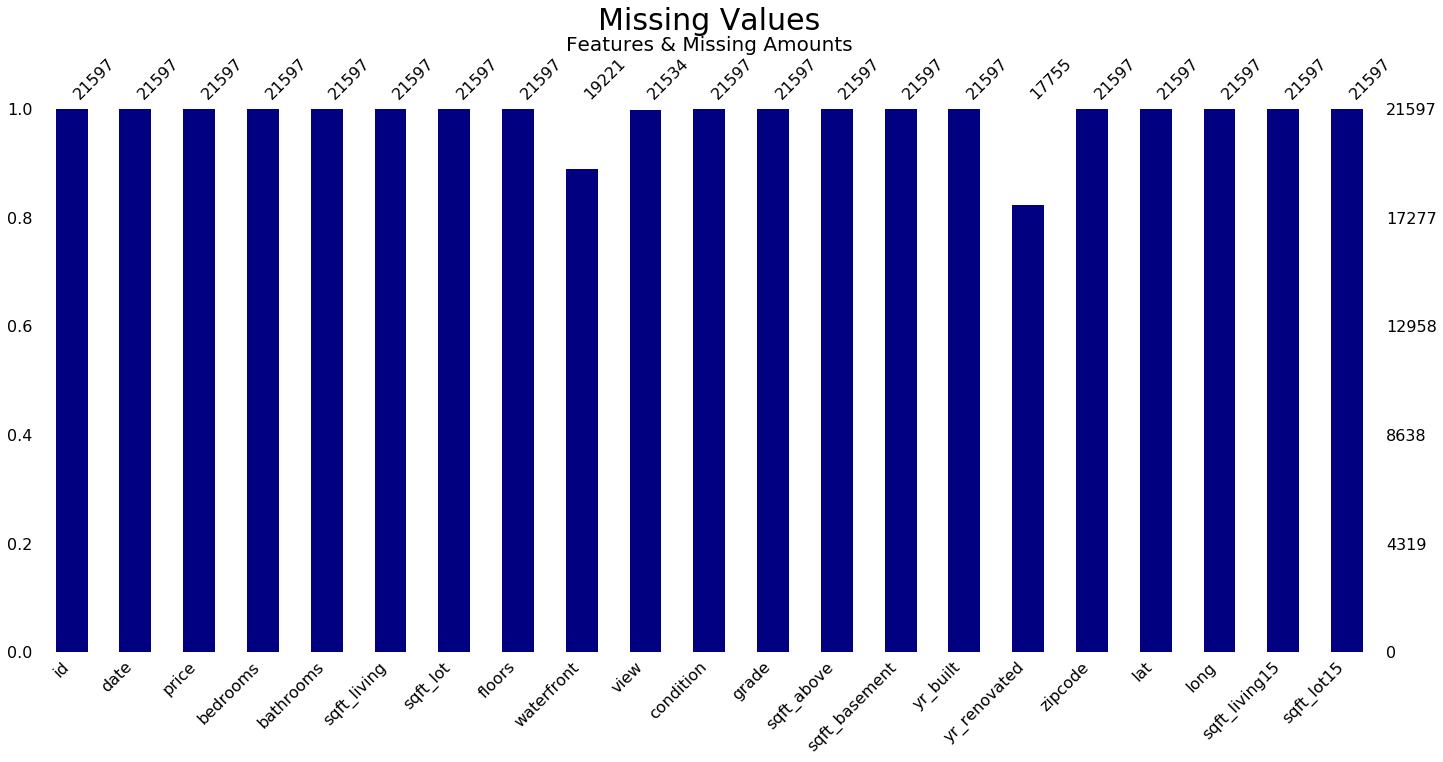

In [14]:
msno.bar(df, color='navy')
plt.title('Missing Values', fontsize=30)
plt.xlabel('Features & Missing Amounts', fontsize=20)
plt.ylabel('Percent Missing', fontsize=10)
plt.show()

In [15]:
df.drop(columns=['waterfront', 'view'], inplace=True)

In [16]:
df.loc[df['id'].duplicated(keep=False)]

id        date      price  bedrooms  bathrooms  sqft_living  \
93     6021501535   7/25/2014   430000.0         3       1.50         1580   
94     6021501535  12/23/2014   700000.0         3       1.50         1580   
313    4139480200   6/18/2014  1380000.0         4       3.25         4290   
314    4139480200   12/9/2014  1400000.0         4       3.25         4290   
324    7520000520    9/5/2014   232000.0         2       1.00         1240   
...           ...         ...        ...       ...        ...          ...   
20654  8564860270   3/30/2015   502000.0         4       2.50         2680   
20763  6300000226   6/26/2014   240000.0         4       1.00         1200   
20764  6300000226    5/4/2015   380000.0         4       1.00         1200   
21564  7853420110   10/3/2014   594866.0         3       3.00         2780   
21565  7853420110    5/4/2015   625000.0         3       3.00         2780   

       sqft_lot  floors  condition  grade  sqft_above sqft_basement  yr_built  \
93         5000     1.0          3      8        1290         290.0      1939   
94         5000     1.0          3      8        1290         290.0      1939   
313       12103     1.0          3     11        2690        1600.0      1997   
314       12103     1.0          3     11        2690        1600.0      1997   
324       12092     1.0          3      6         960         280.0      1922   
...         ...     ...        ...    ...         ...           ...       ...   
20654      5539     2.0          3      8        2680           0.0      2013   
20763      2171     1.5          3      7        1200           0.0      1933   
20764      2171     1.5          3      7        1200           0.0      1933   
21564      6000     2.0          3      9        2780           0.0      2013   
21565      6000     2.0          3      9        2780           0.0      2013   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
93              0.0    98117  47.6870 -122.386           1570        4500  
94              0.0    98117  47.6870 -122.386           1570        4500  
313             0.0    98006  47.5503 -122.102           3860       11244  
314             0.0    98006  47.5503 -122.102           3860       11244  
324          1984.0    98146  47.4957 -122.352           1820        7460  
...             ...      ...      ...      ...            ...         ...  
20654           0.0    98045  47.4759 -121.734           2680        5992  
20763           0.0    98133  47.7076 -122.342           1130        1598  
20764           0.0    98133  47.7076 -122.342           1130        1598  
21564           0.0    98065  47.5184 -121.886           2850        6000  
21565           NaN    98065  47.5184 -121.886           2850        6000  

[353 rows x 19 columns]

    Looks like the same houses were SOLD at different dates/diff prices
    Going to keep because they were still sold.

In [17]:
(df.yr_renovated == 0.).sum()

17011

In [18]:
df.yr_renovated.isna().sum()

3842

In [19]:
df.yr_renovated.isna().sum() + (df.yr_renovated == 0.).sum()

20853

    There are SO many that are 0. So lets make the missing ones 0 too.

In [20]:
df.yr_renovated.fillna(value=0., inplace=True)

    Data clean of Missing values

## Placeholder Check & Fix

In [21]:
check_each_col(df.columns)

id
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
date
['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014'
 '7/7/2014' '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014'
 '4/28/2015' '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015'
 '3/3/2015' '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014'
 '8/28/2014' '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014'
 '8/25/2014' '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014'
 '3/16/2015' '11/5/2014' '4/20/2015' '6/9/2014' '3/23/2015' '12/2/2014'
 '12/22/2014' '1/28/2015' '6/2/2014' '11/14/201

    ID - fine
    Date - fine
    price - fine
    bedrooms - fine
    bathrooms - fine
    sqft_living - fine
    floors - fine
    condition - fine
    grade - fine
    sqft_above - fine
    sqft_basement - NOT FINE (there are ? and 0's)
    yr_built - fine
    yr_renovated - fine
    zipcode - fine
    lat/long - fine
    sqft_living15/lot15 - fine

In [22]:
(df.sqft_basement == '?').sum()

454

    There are only 454 houses without a basement sqft number (which is about 2% of my data)
    Should I make them 0's?
    Yeah they won't effect that much 

In [23]:
df['sqft_basement'].replace('?', 0, inplace=True)

    Data clean of placeholders

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(11), object(2)
memory usage: 3.1+ MB


# Change Type

In [25]:
df['date'] = pd.to_datetime(df['date'])
df['yr_built']= df['yr_built'].astype(int)
df['yr_renovated'] = df['yr_renovated'].astype(int)
df['sqft_basement']= df['sqft_basement'].astype(float)

# Outlier finder

In [28]:
cleanish =df.loc[(df.price < 900000) & (df.price > 150000)]
cleanish

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  condition  grade  sqft_above  sqft_basement  \
0          5650     1.0          3      7        1180            0.0   
1          7242     2.0          3      7        2170          400.0   
2         10000     1.0          3      6         770            0.0   
3          5000     1.0          5      7        1050          910.0   
4          8080     1.0          3      8        1680            0.0   
...         ...     ...        ...    ...         ...            ...   
21592      1131     3.0          3      8        1530            0.0   
21593      5813     2.0          3      8        2310            0.0   
21594      1350     2.0          3      7        1020            0.0   
21595      2388     2.0          3      8        1600            0.0   
21596      1076     2.0          3      7        1020            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[19329 rows x 19 columns]

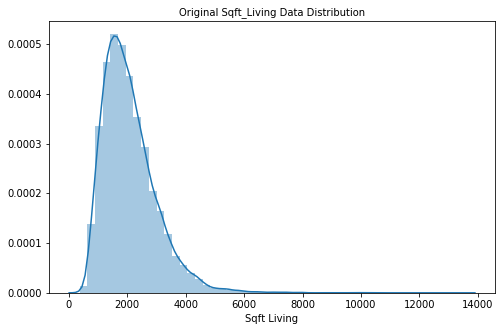

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(df['sqft_living'])
plt.title('Original Sqft_Living Data Distribution', fontsize=10)
plt.xlabel('Sqft Living')
plt.show()

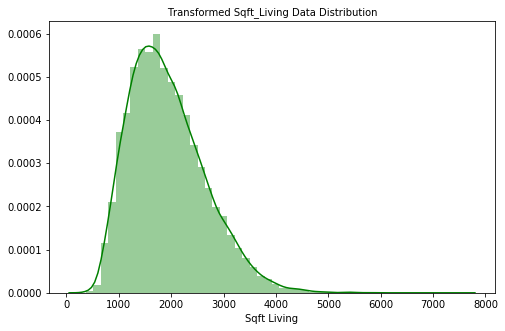

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(cleanish['sqft_living'], color='green')
plt.title('Transformed Sqft_Living Data Distribution', fontsize=10)
plt.xlabel('Sqft Living')
plt.show()

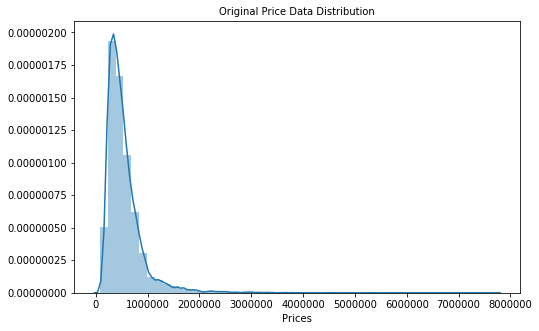

In [31]:
plt.figure(figsize=(8,5))
sns.distplot(df['price'])
plt.title('Original Price Data Distribution', fontsize=10)
plt.xlabel('Prices')
plt.show()

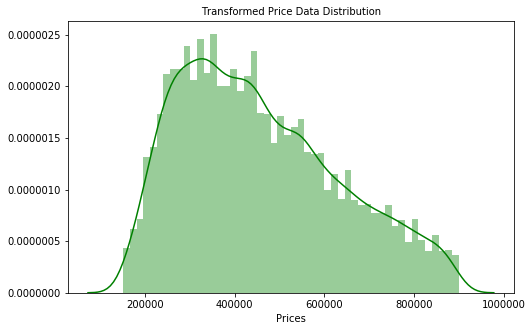

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(cleanish['price'], color='green', bins=50)
plt.title('Transformed Price Data Distribution', fontsize=10)
plt.xlabel('Prices')
plt.show()

In [45]:
len(df.columns)

19

Why to use zscore?


* Shows how many std values are from the mean


In [ ]:
features = list(df.columns.drop(['id','date']))

In [ ]:
from scipy import stats
df[(np.abs(stats.zscore(df[features])) < 3).all(axis=1)]

In [ ]:
new_df = df[(np.abs(stats.zscore(df[features])) < 3).all(axis=1)]

I don't really need IDS to work with.


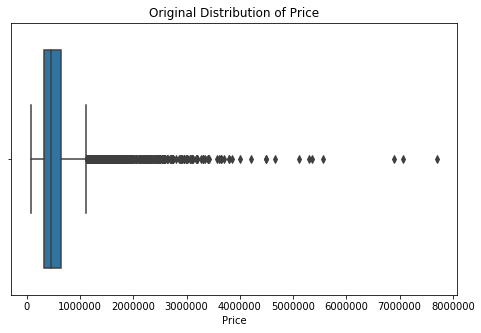

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(df['price'], data=df)
plt.title('Original Distribution of Price')
plt.xlabel('Price')
plt.show()
# sns.regplot(new_df['price'], new_df['bathrooms'], data=df)

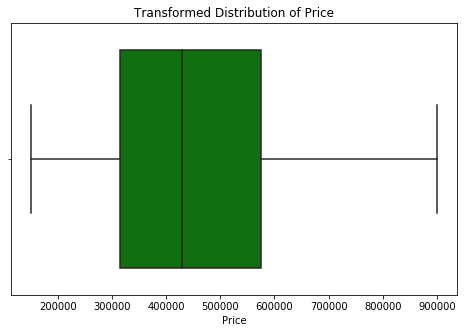

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(cleanish['price'], data=df, color='green')
plt.title('Transformed Distribution of Price')
plt.xlabel('Price')
plt.show()
# plt.hist(new_df['price'])

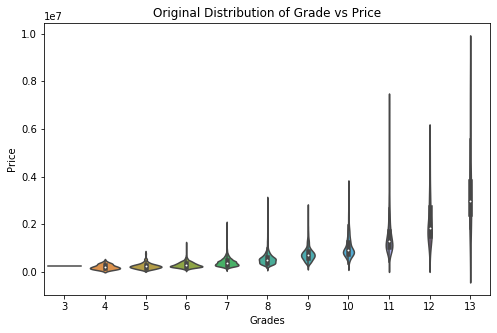

In [35]:
plt.figure(figsize=(8,5))
sns.violinplot(df['grade'], df['price'], data=df)
plt.title('Original Distribution of Grade vs Price')
plt.xlabel('Grades')
plt.ylabel('Price')
plt.show()

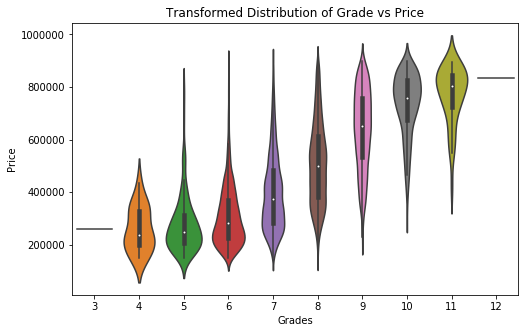

In [36]:
plt.figure(figsize=(8,5))
sns.violinplot(cleanish['grade'], cleanish['price'], data=cleanish)
plt.title('Transformed Distribution of Grade vs Price')
plt.xlabel('Grades')
plt.ylabel('Price')
plt.show()

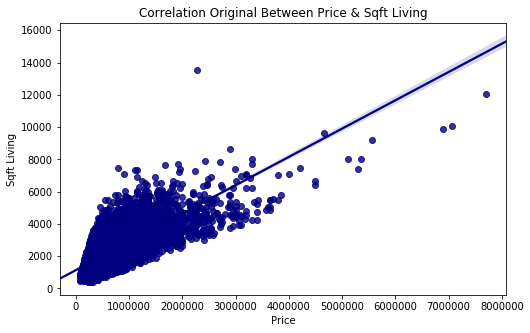

In [37]:
plt.figure(figsize=(8,5))
sns.regplot(df['price'], df['sqft_living'], data=df, color='navy')
plt.title('Correlation Original Between Price & Sqft Living')
plt.xlabel('Price')
plt.ylabel('Sqft Living')
plt.show()

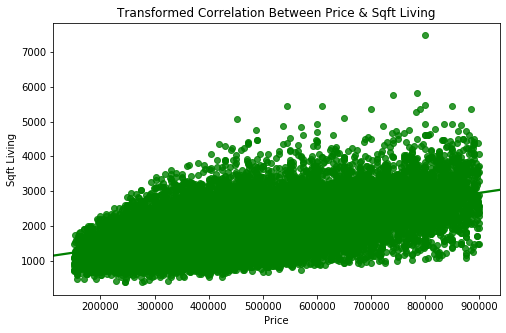

In [38]:
plt.figure(figsize=(8,5))
sns.regplot(cleanish['price'], cleanish['sqft_living'], data=cleanish, color='green')
plt.title('Transformed Correlation Between Price & Sqft Living')
plt.xlabel('Price')
plt.ylabel('Sqft Living')
plt.show()

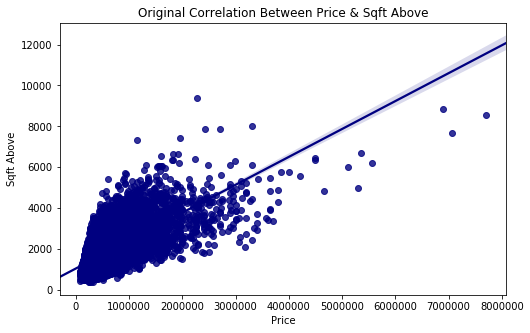

In [39]:
plt.figure(figsize=(8,5))
sns.regplot(df['price'], df['sqft_above'], data=df, color='navy')
plt.title('Original Correlation Between Price & Sqft Above')
plt.xlabel('Price')
plt.ylabel('Sqft Above')
plt.show()

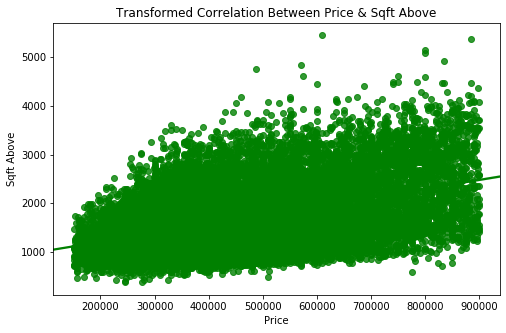

In [40]:
plt.figure(figsize=(8,5))
sns.regplot(x=cleanish['price'], y = cleanish['sqft_above'], data=cleanish, color='green')
plt.title('Transformed Correlation Between Price & Sqft Above')
plt.xlabel('Price')
plt.ylabel('Sqft Above')
plt.show()

    AWESOME! The data has less outliers the boxplots look much better!
    .
    .
    .
    .
    Lets try with IQR

# Categorical vs Continuous

Categorical

    ids
    date
    condition
    grade
    zipcode
    floor
    lat
    long
    yr_build
    yr_renovated
    
Continuous

    bedroom
    bathroom
    price
    sqft_living
    sqft_lot
    sqft_above
    sqft_basement
    sqft_lining15
    sqft_lot15

# Final Touches Column Drops


In [42]:
cleaned_df = cleanish

In [43]:
cleaned_df.to_csv('cleaned_df.csv',index=False)

In [44]:
df = pd.read_csv('cleaned_df.csv')

In [ ]:
sns.boxplot(x ='grade', y='price' ,data=df)

In [ ]:
plt.figure(figsize=(13, 8))
sns.scatterplot(x=cleanish['long'], y= cleanish['lat'], data=cleanish, hue='price')
plt.title('Geographcal Map of King County Houses By Price')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x=cleanish['price'], y=cleanish['sqft_lot'], data=cleanish)

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x=cleanish['price'], y=cleanish['sqft_above'], data=cleanish)